In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import sys
sys.path.insert(0, 'src')
#sys.path.insert(0, 'geospatial')
import geospatial
from statsmodels.tsa.stattools import adfuller
from analyze import test
import os

/home/lmd003/.local/lib/python3.7/site-packages/arcgis/features/_data/geodataset/utils.py:15: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pd.datetime,


In [2]:
def test_stationarity(timeseries, title):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title(title)
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

Data gathering and processing must be run before we can use this notebook

In [3]:
arrests = pd.read_csv('data/cleaned/arrests-processed.csv')
stops = pd.read_csv('data/cleaned/stops-processed.csv')
crimes = pd.read_csv('data/cleaned/crime-processed.csv')

In [5]:
div_map = {'FOOTHILL':16,'SEVENTY-SEVENTH':12,'NEWTON':13,'OLYMPIC':20,'TOPANGA':21,'PACIFIC':14,'WEST VALLEY':10,'SOUTH WEST':3,'SOUTH EAST':18,'DEVONSHIRE':17,'NORTH HOLLYWOOD':15,'MISSION':19,'WEST LA':8,'HOLLYWOOD':6,'HARBOR':5,'WILSHIRE':7,'CENTRAL':1,'VAN NUYS':9,'HOLLENBECK':4,'RAMPART':2,'NORTH EAST':11}

In [6]:
stops['Stop Date'] =pd.to_datetime(stops['Stop Date'])

In [7]:
daily_stops = stops.loc[stops.Year!=2020].groupby('Stop Date').size()

After filtering for stops between 2010-2019 we plot the daily stops throughtouth the years

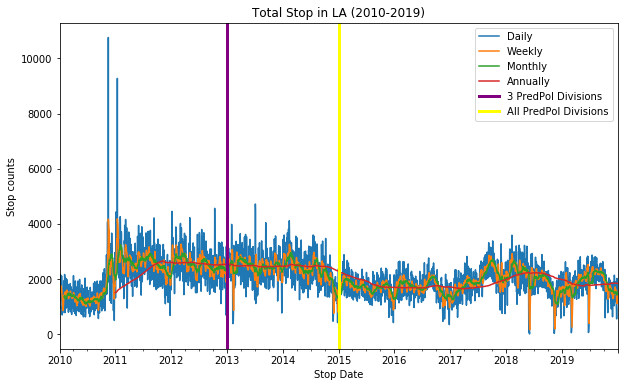

In [8]:
fig = plt.figure(figsize=(10, 6))
ax = daily_stops.plot(legend=False)
ax.set_title('Total Stop in LA (2010-2019)')
ax.set_ylabel('Stop counts')
#ax.set_xlabel('Stop Date')
daily_stops.rolling(window=7).mean().plot(ax=ax)
daily_stops.rolling(window=30).mean().plot(ax=ax)
daily_stops.rolling(window=365).mean().plot(ax=ax)
plt.axvline(dt.datetime(2013, 1, 1), linewidth=3, color='purple')
plt.axvline(dt.datetime(2015, 1, 1), linewidth=3, color='yellow')
ax.legend(['Daily', 'Weekly', 'Monthly', 'Annually', '3 PredPol Divisions', 'All PredPol Divisions'])
plt.show()

In [9]:
#stops[stops['Stop Division'].isin(['NORTH HOLLYWOOD', 'SOUTH WEST', 'FOOTHILL'])]
all_div = stops.loc[stops.Year!=2020].groupby(['Year','Stop Division']).size().unstack()
all_div.head()

Stop Division,CENTRAL,DEVONSHIRE,FOOTHILL,HARBOR,HOLLENBECK,HOLLYWOOD,MISSION,NEWTON,NORTH EAST,NORTH HOLLYWOOD,...,PACIFIC,RAMPART,SEVENTY-SEVENTH,SOUTH EAST,SOUTH WEST,TOPANGA,VAN NUYS,WEST LA,WEST VALLEY,WILSHIRE
Year,,,,,,,,,,,,,,,,,,,,,
2010.0,44819,3977,6330,7,21643,8,20695,32358,22920,22145,...,71520,12016,40676,19767,39151,16852,48274,31429,24792,34371
2011.0,77892,26560,48875,68376,31462,33397,17543,33719,16710,6002,...,87008,40354,132720,45796,59215,30788,47376,27385,46727,23303
2012.0,32799,44507,80408,34231,9722,38038,40627,68407,17820,42427,...,54306,22863,72213,54809,47156,61511,24463,39841,49696,32009
2013.0,55067,43960,9861,29678,3,236169,42256,41642,20108,44926,...,39698,17995,29909,19185,46174,29750,86865,10379,23205,48771
2014.0,124018,35602,18995,3079,16409,3514,51634,9904,14493,48807,...,32521,51840,64476,56989,11326,13953,63970,46481,32259,71260


To view the stops by the PredPol early adopters we filterfor stops between the 2013-2014 and plot the following

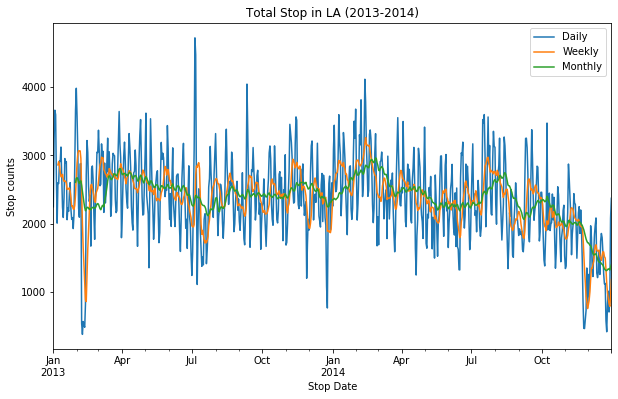

In [13]:
filtered_stops = stops.loc[(stops.Year>=2013)&(stops.Year<=2014)].groupby('Stop Date').size()
fig = plt.figure(figsize=(10, 6))
ax = filtered_stops.plot(legend=False)
ax.set_title('Total Stop in LA (2013-2014)')
ax.set_ylabel('Stop counts')
#ax.set_xlabel('Stop Date')
filtered_stops.rolling(window=7).mean().plot(ax=ax)
filtered_stops.rolling(window=30).mean().plot(ax=ax)
ax.legend(['Daily', 'Weekly', 'Monthly'])
plt.show()

Then we look at the total stops broken by different racial groups

Text(0, 0.5, 'stop counts')

<Figure size 720x432 with 0 Axes>

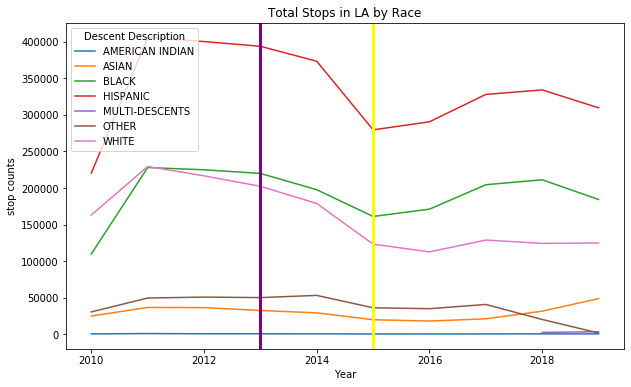

In [16]:
func = lambda x: x/x.sum()
fig = plt.figure(figsize=(10, 6))
race = stops.loc[stops.Year!=2020].groupby(['Year','Descent Description']).size().unstack()#.plot(kind='bar')
ax = race.plot(figsize=(10, 6), title = 'Total Stops in LA by Race')
plt.axvline(2013, linewidth=3, color='purple')
plt.axvline(2015, linewidth=3, color='yellow')
ax.set_ylabel('stop counts')
#ax.set_xlabel('Stop Date')

Looking even further, we look at the stop rates by race as function of the total stops made

Text(0, 0.5, 'Stop Proportion')

<Figure size 720x432 with 0 Axes>

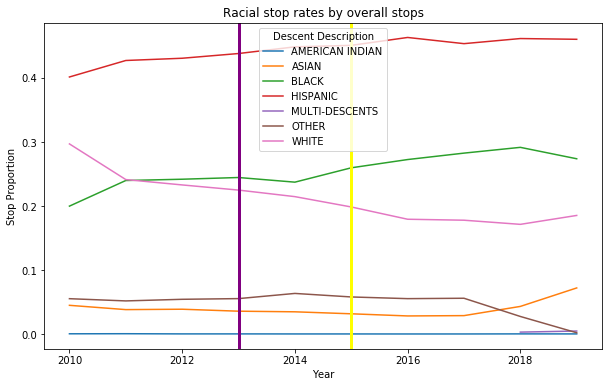

In [18]:
fig = plt.figure(figsize=(10, 6))
ax = race.apply(func,axis=1).plot(figsize=(10, 6), title = 'Racial stop rates by overall stops')
#test.rolling(window=7).mean().plot(ax=ax)
#test.rolling(window=30).mean().plot(ax=ax)
plt.axvline(2013, linewidth=3, color='purple')
plt.axvline(2015, linewidth=3, color='yellow')
ax.set_ylabel('Stop Proportion')

In [19]:
pops = geospatial.read_gis()
div_pops = geospatial.pop_by_div(pops)

Reading GIS data.


/home/lmd003/.local/lib/python3.7/site-packages/arcgis/features/layer.py:2044: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  "esriFieldTypeDate" : pd.datetime,


Complete.


src/geospatial.py:52: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pop = df.groupby([group]) ['H7Z001','H7Z002','H7Z003','H7Z004','H7Z005','H7Z006','H7Z007','H7Z008','H7Z009','H7Z010'].sum().sort_index().reset_index()#.sort_values(ascending = False)


        H7Z001:      Total
        H7Z002:      Not Hispanic or Latino
        H7Z003:      Not Hispanic or Latino: White alone
        H7Z004:      Not Hispanic or Latino: Black or African American alone
        H7Z005:      Not Hispanic or Latino: American Indian and Alaska Native alone
        H7Z006:      Not Hispanic or Latino: Asian alone
        H7Z007:      Not Hispanic or Latino: Native Hawaiian and Other Pacific Islander alone
        H7Z008:      Not Hispanic or Latino: Some Other Race alone
        H7Z009:      Not Hispanic or Latino: Two or More Races
        H7Z010:      Hispanic or Latino

In [20]:
race_pops = div_pops[['PREC','H7Z003', 'H7Z004', 'H7Z005', 'H7Z006', 'H7Z008', 'H7Z009', 'H7Z010']].rename(columns={'H7Z003':'WHITE', 'H7Z004':'BLACK', 'H7Z005':'AMERICAN INDIAN', 'H7Z006':'ASIAN', 'H7Z008':'OTHER', 'H7Z009':'MULTI-DESCENTS', 'H7Z010':'HISPANIC'})
race_pops['PREC'] = race_pops['PREC'].replace(dict([[div_map[i], i] for i in div_map]))
vals = race_pops[['AMERICAN INDIAN', 'ASIAN', 'BLACK', 'HISPANIC', 'MULTI-DESCENTS','OTHER', 'WHITE']].sum()

Looking at stop rates even further we decide to look at the stop rates as function of the populations in LA

Text(0, 0.5, 'Stop rates')

<Figure size 720x432 with 0 Axes>

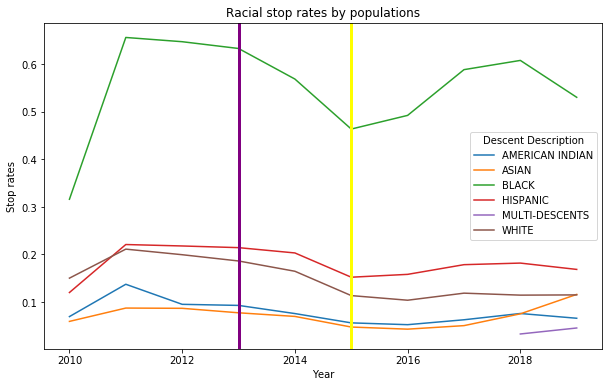

In [33]:
fig = plt.figure(figsize=(10, 6))
ax  = (race[['AMERICAN INDIAN', 'ASIAN', 'BLACK', 'HISPANIC', 'MULTI-DESCENTS', 'WHITE']]/vals[['AMERICAN INDIAN', 'ASIAN', 'BLACK', 'HISPANIC', 'MULTI-DESCENTS','WHITE']]).plot(figsize=(10, 6), title = 'Racial stop rates by populations')
plt.axvline(2013, linewidth=3, color='purple')
plt.axvline(2015, linewidth=3, color='yellow')
ax.set_ylabel('Stop rates')
#ax.set_xlabel('Stop Date')

We then run the Dickey Fuller test during various periods through various time periods to see how stationary the data is. The time periods are: 
- all years, 2010-2019
- pre PredPol, 2010-2012
- early PredPpol, 2013-2014
- all PredPol, 2015-2019

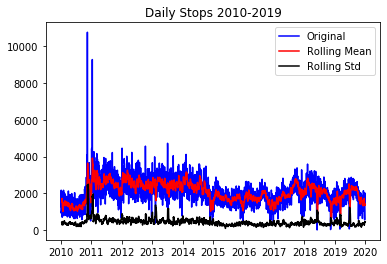

Results of Dickey-Fuller Test:
Test Statistic                   -3.739525
p-value                           0.003590
#Lags Used                       30.000000
Number of Observations Used    3621.000000
Critical Value (1%)              -3.432157
Critical Value (5%)              -2.862339
Critical Value (10%)             -2.567195
dtype: float64


In [34]:
test_stationarity(daily_stops, 'Daily Stops 2010-2019')

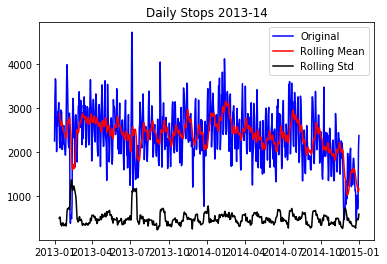

Results of Dickey-Fuller Test:
Test Statistic                  -3.572334
p-value                          0.006313
#Lags Used                      12.000000
Number of Observations Used    717.000000
Critical Value (1%)             -3.439503
Critical Value (5%)             -2.865579
Critical Value (10%)            -2.568921
dtype: float64


In [35]:
test_stationarity(filtered_stops, 'Daily Stops 2013-14')

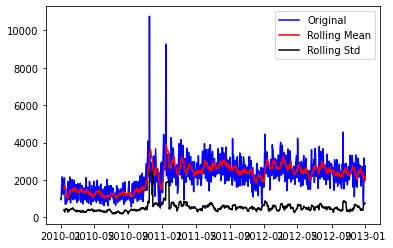

Results of Dickey-Fuller Test:
Test Statistic                   -2.636900
p-value                           0.085608
#Lags Used                       21.000000
Number of Observations Used    1074.000000
Critical Value (1%)              -3.436453
Critical Value (5%)              -2.864235
Critical Value (10%)             -2.568205
dtype: float64


In [113]:
test_stationarity(stops.loc[(stops.Year<=2012)&(stops.Year!=2020)].groupby('Stop Date').size(),'Daily Stops pre-2013')

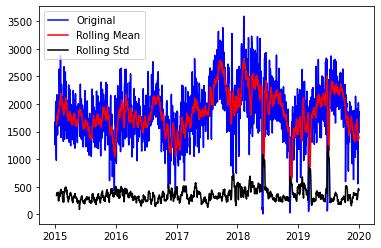

Results of Dickey-Fuller Test:
Test Statistic                   -3.646771
p-value                           0.004927
#Lags Used                       25.000000
Number of Observations Used    1800.000000
Critical Value (1%)              -3.433988
Critical Value (5%)              -2.863147
Critical Value (10%)             -2.567626
dtype: float64


In [114]:
test_stationarity(stops.loc[(stops.Year>=2015)&(stops.Year!=2020)].groupby('Stop Date').size(),'Daily Stops post-2015')

And Finally, we look at how PredPol affects the stops by race through running t-tests below

In [125]:
RACES = ['BLACK', 'WHITE', 'ASIAN', 'OTHER', 'HISPANIC', 'AMERICAN INDIAN','MULTI-DESCENTS']

def format_df(df, feat, scope=False, area=False, group='PredPol Deployed', group2=['Area Name', 'PredPol Deployed']):
    if feat == 'Descent Description':
        group = 'PredPol Deployed'
        group2 = ['Stop Division', 'PredPol Deployed']
    if scope:
        df = df.loc[(df.Year >= 2013) & (df.Year <= 2014)]
    else:
        df = df.loc[df.Year != 2020]
    if not area:
        return df.groupby(group)[feat].value_counts(normalize=True).unstack().T
    else:
        return df.groupby(group2)[feat].value_counts(normalize=True).unstack()

format_df(crimes, 'Crime Type', scope=True)

def test_overall(df, outpath, feat, scope=False):
    print('Testing overall distribution of {}.'.format(feat))
    types = format_df(df, scope=scope, feat=feat)
    statvals = []
    pvals = []
    for tp, row in types.iterrows():
        print('{}: {}'.format(feat, tp))
        try:
            stat, pval = test(tp, row[1], row[0])
        except IndexError:
            stat, pval = 0.0, 0.0
        statvals.append(round(stat, 5))
        pvals.append(round(pval, 5))
        print('Statistic = ', stat)
        print('P-Value = {}\n'.format(pval))
    if feat == 'Crime Type' or feat == 'Charge Group Description':
        idx = TYPES
    elif feat == 'Crime Charge' or feat == 'Arrest Type Code':
        idx = CHARGES
    elif feat == 'Descent Description':
        idx = RACES
    if scope:
        title = 'ovr_{}_dist_2013-14.csv'.format(feat)
    else:
        title = 'ovr_{}_dist.csv'.format(feat)
    try:
        pd.DataFrame({'Statistic':statvals, 'P-Value':pvals}, index=idx).to_csv(os.path.join(outpath, title))
    except ValueError:
        pd.DataFrame({'Statistic':statvals, 'P-Value':pvals}, index=idx[:-1]).to_csv(os.path.join(outpath, title))
    print('Complete.')

test_overall(stops, '', 'Descent Description', scope=True)

Testing overall distribution of Descent Description.
Descent Description: AMERICAN INDIAN
Statistic =  0.9377866921890402
P-Value = 0.34835630634764847

Descent Description: ASIAN
Statistic =  -0.47464987991647245
P-Value = 0.6350375838196184

Descent Description: BLACK
Statistic =  3.4581892534091936
P-Value = 0.0005440454236231655

Descent Description: HISPANIC
Statistic =  0.5324386927091692
P-Value = 0.594423375640113

Descent Description: OTHER
Statistic =  -3.364525476922957
P-Value = 0.0007670420311644149

Descent Description: WHITE
Statistic =  -0.41609421182529094
P-Value = 0.6773419582390718

Complete.
